## MICROSOFT MOVIE STUDIO ANALYSIS
BY: LYNNE K. MUTWIRI

![microsoft Movies](ImageMicrosoft.jpg)

### Project Overview
This project analyzes film performance with regard to genre preference, movie rating, movie director rating and return on movie investment to help Microsoft in determining what type of films to create since they have decided to create original video content.

### Business Problem
Microsoft needs to understand what original movie creation entails. This includes understanding what films will sell more so that they can maximize on their returns and make the investment worthwhile. This analysis answers some of the major questions they may have regarding the new movie studio. I compared data from various movie studios to study the relationship between production cost and returns, movie genres and rating against returns and pick actionable insights from the resulting patterns. 

![movie image](ProjectImage1.jpg)

### Data Understanding
I worked with various datasets detailing different aspects of the film industry such as best rated genres, highest grossing genres, production cost vis a vis return on movie production investment and best rated directors.

In [1]:
# Importing relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import sqlite3
#creating a connection to the IM Database
conn = sqlite3.connect('im.db')

In [2]:
#Reading the Movie Ratings table
df1 = pd.read_sql(''' 
                    SELECT * 
                    FROM
                   movie_ratings''', 
                    conn)
df1

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [3]:
#Reading the Movie Basics table from the IMDB file
df2 = pd.read_sql(''' 
                    SELECT * 
                    FROM
                   movie_basics''', 
                    conn)
df2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None


### Data Preparation and Cleaning

Merging the two tables

In [4]:
#Merging the Movie Ratings and Movie Basics tables
df3 = pd.read_sql('''SELECT primary_title, start_year, genres, averagerating, numvotes 
                  from movie_basics as m_basics
                  JOIN movie_ratings as m_ratings
                  ON m_basics.movie_id = m_ratings.movie_id
                  WHERE averagerating BETWEEN 7 AND 9
                  ORDER by numvotes DESC;
                 ''', conn)
df3

,primary_title,start_year,genres,averagerating,numvotes
0,Inception,2010,"Action,Adventure,Sci-Fi",8.8,1841066
1,The Dark Knight Rises,2012,"Action,Thriller",8.4,1387769
2,Interstellar,2014,"Adventure,Drama,Sci-Fi",8.6,1299334
3,Django Unchained,2012,"Drama,Western",8.4,1211405
4,The Avengers,2012,"Action,Adventure,Sci-Fi",8.1,1183655
...,...,...,...,...,...
25902,Evil online: Il Male in Diretta,2017,Horror,7.2,5
25903,The Wolf and the Seven Kids,2017,Documentary,7.8,5
25904,Single Single: Love Is Not Enough,2018,Romance,7.4,5
25905,Up to the Last Drop: The Secret Water War in E...,2017,Documentary,8.2,5


In [5]:
# Determining whether there are any null values in the resulting table

null_values = df3.isna().sum().sum()

if null_values == 0:
    print ('There are {} null values'. format(null_values))
else:
        print ('There are {} null values'. format(null_values))

There are 317 null values


In [6]:
#testing for duplicated rows
df3.duplicated().any() 

False

In [7]:
#getting the number of times each genre was voted and converting into a DataFrame
total_genre_counts = df3['genres'].value_counts().head(3)
total_counts_df = pd.DataFrame({'count': total_genre_counts.values}, index=total_genre_counts.index).rename_axis('genres')
total_counts_df

,count
genres,
Documentary,6409
Drama,3940
Comedy,1184


In [8]:
#Identifying the most popular group of genres
pop_genre = pd.DataFrame(df3.groupby('genres')['numvotes'].mean()).sort_values(by='numvotes', ascending=False).iloc[:15]
pop_genre

,numvotes
genres,
"Adventure,Mystery,Sci-Fi",538720.000000
"Action,Adventure,Sci-Fi",472609.088235
"Adventure,Drama,Sci-Fi",329935.666667
"Action,Adventure,Thriller",313244.000000
"Action,Adventure,Fantasy",285457.166667
"Biography,Drama,Thriller",217802.375000
"Adventure,Fantasy,Mystery",212785.000000
"Action,Drama,Sci-Fi",192928.333333
"Adventure,Family,Fantasy",180846.166667


In [9]:
bom_movie = pd.read_csv('bom.movie_gross.csv')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [10]:
df = pd.read_csv('tmdb.movies.csv', index_col=0)
df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...
26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [11]:
df.isna().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

In [12]:
df.duplicated().value_counts()

False    25497
True      1020
dtype: int64

In [13]:
#Check for duplicates 
df.drop_duplicates(keep='first', inplace = True)

In [14]:
#confirm all duplicate are dropped
df.duplicated().value_counts()

False    25497
dtype: int64

In [15]:
df = df.drop(['original_language', 'original_title'], axis = 1)

In [16]:
#confirming the columns have been eliminated
df.shape

(25497, 7)

Cleaning the tn.movie_budget.csv file

In [17]:
movie_budget = pd.read_csv('tn.movie_budgets.csv', index_col=0)


In [18]:
movie_budget.isna().sum()

release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [19]:
#Checking for duplicated values
movie_budget.duplicated().value_counts()

False    5782
dtype: int64

In [20]:
# Define a function to remove the dollar signs and commas from the column values
def remove_signs(gross_value):
    #Check if it is a string first to apply the .replace()method then convert it back to float
    if isinstance(gross_value, str):
        return float(gross_value.replace('$', '').replace(',', ''))
    else:
        return gross_value
# Apply the function to the appropriate columns
movie_budget['production_budget'] = movie_budget['production_budget'].apply(remove_signs)
movie_budget['domestic_gross'] = movie_budget['domestic_gross'].apply(remove_signs)
movie_budget['worldwide_gross'] = movie_budget['worldwide_gross'].apply(remove_signs)
# Check the updated DataFrame
movie_budget

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000.0,760507625.0,2.776345e+09
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000.0,241063875.0,1.045664e+09
3,"Jun 7, 2019",Dark Phoenix,350000000.0,42762350.0,1.497624e+08
4,"May 1, 2015",Avengers: Age of Ultron,330600000.0,459005868.0,1.403014e+09
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000.0,620181382.0,1.316722e+09
...,...,...,...,...,...
78,"Dec 31, 2018",Red 11,7000.0,0.0,0.000000e+00
79,"Apr 2, 1999",Following,6000.0,48482.0,2.404950e+05
80,"Jul 13, 2005",Return to the Land of Wonders,5000.0,1338.0,1.338000e+03


In [21]:
#Calculating the return on investment(ROI) on movie production.
movie_budget['ROI'] = ((movie_budget['worldwide_gross'] - movie_budget['production_budget']) / movie_budget['production_budget']).round(2)
movie_budget['ROI']


id
1       5.53
2       1.55
3      -0.57
4       3.24
5       3.15
       ...  
78     -1.00
79     39.08
80     -0.73
81     -1.00
82    163.58
Name: ROI, Length: 5782, dtype: float64

In [22]:
movie_budget_sorted = movie_budget.sort_values(by = 'ROI', ascending=False).head(20).iloc[1:20]

### Cleaning the bom.movie_gross.csv file

In [23]:
bom_movie = pd.read_csv('bom.movie_gross.csv')


In [24]:
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [25]:
#finding the percentage of missing values(NaN) per column
bom_movie.isna().sum()/len(bom_movie)*100

title              0.000000
studio             0.147623
domestic_gross     0.826690
foreign_gross     39.858282
year               0.000000
dtype: float64

In [26]:
#further analysis on the foreign_gross NaN to determine next course of action
bom_movie[bom_movie['foreign_gross'].isna()]

,title,studio,domestic_gross,foreign_gross,year
222,Flipped,WB,1800000.0,NaN,2010
254,The Polar Express (IMAX re-issue 2010),WB,673000.0,NaN,2010
267,Tiny Furniture,IFC,392000.0,NaN,2010
269,Grease (Sing-a-Long re-issue),Par.,366000.0,NaN,2010
280,Last Train Home,Zeit.,288000.0,NaN,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


Seeing that a large percentage of foreign gross is missing, I chose to drop the entire column.
I left out the option of using the mean or median since the figures are quite widely distributed and not using it would make a negligible to nil impact on our analysis.

In [27]:
#Dropping the foreign gross column
bom_movie.drop('foreign_gross', axis = 1, inplace = True)

In [28]:
#checking the rows that are missing values in the studio column
bom_movie[bom_movie['studio'].isna()]

,title,studio,domestic_gross,year
210,Outside the Law (Hors-la-loi),NaN,96900.0,2010
555,Fireflies in the Garden,NaN,70600.0,2011
933,Keith Lemon: The Film,NaN,NaN,2012
1862,Plot for Peace,NaN,7100.0,2014
2825,Secret Superstar,NaN,NaN,2017


Since only a small percentage of the studios and domestic_gross values are missing, I figured that dropping them would be the most appropriate action to take since it won't make much of a difference to our data.

In [29]:
#dropping rows with null domesic gross values
bom_movie = bom_movie.dropna(subset=['domestic_gross'])


In [30]:
#dropping rows with null studio values
bom_movie = bom_movie.dropna(subset=['studio'])
bom_movie

,title,studio,domestic_gross,year
0,Toy Story 3,BV,415000000.0,2010
1,Alice in Wonderland (2010),BV,334200000.0,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,2010
3,Inception,WB,292600000.0,2010
4,Shrek Forever After,P/DW,238700000.0,2010
...,...,...,...,...
3382,The Quake,Magn.,6200.0,2018
3383,Edward II (2018 re-release),FM,4800.0,2018
3384,El Pacto,Sony,2500.0,2018
3385,The Swan,Synergetic,2400.0,2018


In [31]:
#Checking for duplicates in the table
bom_movie.duplicated().value_counts()

False    3356
dtype: int64

### ANALYZING THE DATA 

I analyzed the Studios performances based on the domestic gross income received

In [32]:
#Grouping the data by the mean of the domestic gross income 
bom_movie_grouping = bom_movie.groupby('studio')['domestic_gross'].mean()


In [33]:
#Converting the data into a DataFrame and sorting it to enable visualization
grouped_df = pd.DataFrame(bom_movie_grouping).sort_values(by = 'domestic_gross', ascending=False).head(10)
grouped_df

,domestic_gross
studio,
BV,1.737644e+08
P/DW,1.682900e+08
WB (NL),8.879333e+07
Uni.,8.777138e+07
WB,8.691461e+07
Fox,8.051103e+07
Sony,7.761177e+07
Par.,7.609773e+07
MGM,6.666667e+07


Plotting the best performing studios

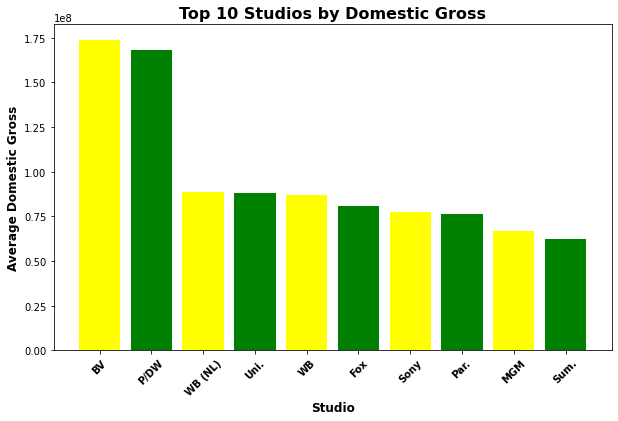

In [34]:
#Plotting the studio domestic gross DataFrame
colors=['yellow','green']
plt.bar(grouped_df['domestic_gross'].index, grouped_df['domestic_gross'].values, color=colors, width=0.8 )
plt.xticks(rotation=45, fontweight='bold')
plt.xlabel("Studio", fontsize = 12, fontweight ='bold')
plt.ylabel("Average Domestic Gross", fontsize = 12, fontweight='bold')
plt.title("Top 10 Studios by Domestic Gross", fontsize = 16, fontweight = 'bold')
plt.gcf().set_size_inches(10,6)
plt.show()

Analyzing the return on investment(ROI)

In [35]:
#Removing outliers and ordering based on ROI
movie_budget_sorted = movie_budget.sort_values(by = 'ROI', ascending=False).head(20).iloc[1:20]
movie_budget_sorted

,release_date,movie,production_budget,domestic_gross,worldwide_gross,ROI
id,,,,,,
14,"Mar 21, 1980",Mad Max,200000.0,8750000.0,99750000.0,497.75
93,"Sep 25, 2009",Paranormal Activity,450000.0,107918810.0,194183034.0,430.52
80,"Jul 10, 2015",The Gallows,100000.0,22764410.0,41656474.0,415.56
7,"Jul 14, 1999",The Blair Witch Project,600000.0,140539099.0,248300000.0,412.83
10,"May 7, 2004",Super Size Me,65000.0,11529368.0,22233808.0,341.06
47,"Aug 13, 1942",Bambi,858000.0,102797000.0,268000000.0,311.35
74,"Feb 26, 1993",El Mariachi,7000.0,2040920.0,2041928.0,290.70
77,"Oct 1, 1968",Night of the Living Dead,114000.0,12087064.0,30087064.0,262.92
11,"Nov 21, 1976",Rocky,1000000.0,117235147.0,225000000.0,224.00


Plotting the ROI

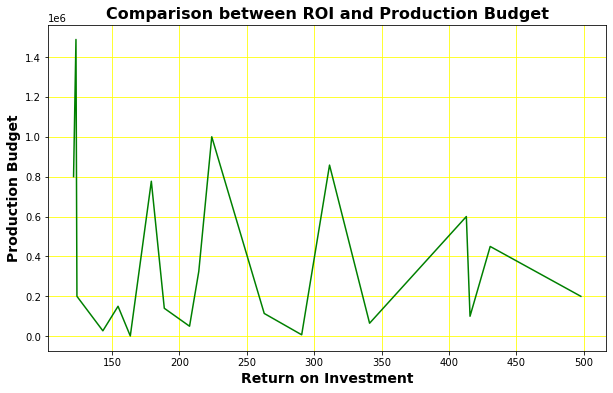

In [36]:
plt.figure(figsize=(10, 6))

# Plotting the lineplot
sns.lineplot(x=movie_budget_sorted['ROI'], y=movie_budget_sorted['production_budget'], color = 'green')

plt.xlabel('Return on Investment', fontsize = 14, fontweight = 'bold')
plt.ylabel('Production Budget', fontsize = 14, fontweight = 'bold')
plt.title('Comparison between ROI and Production Budget', fontsize = 16, fontweight = 'bold')
plt.grid(color = 'yellow')
plt.show()

Individual most voted genres against their counts

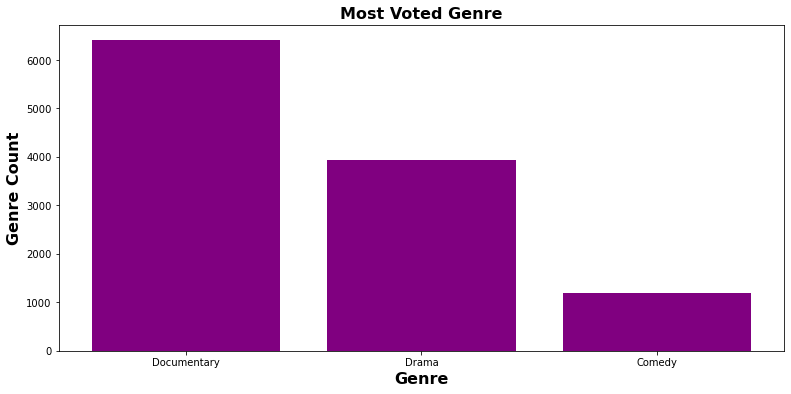

In [37]:
#plotting the individual genres against their count
x = total_counts_df.index
y = total_counts_df["count"]
plt.figure(figsize=(13, 6))
plt.bar(x,y, color = 'purple')
plt.xlabel('Genre', fontsize = 16, fontweight = 'bold')
plt.ylabel('Genre Count', fontsize = 16, fontweight = 'bold')
plt.title('Most Voted Genre', fontsize = 16, fontweight = 'bold');

Most Popular Group of Genres against the votes

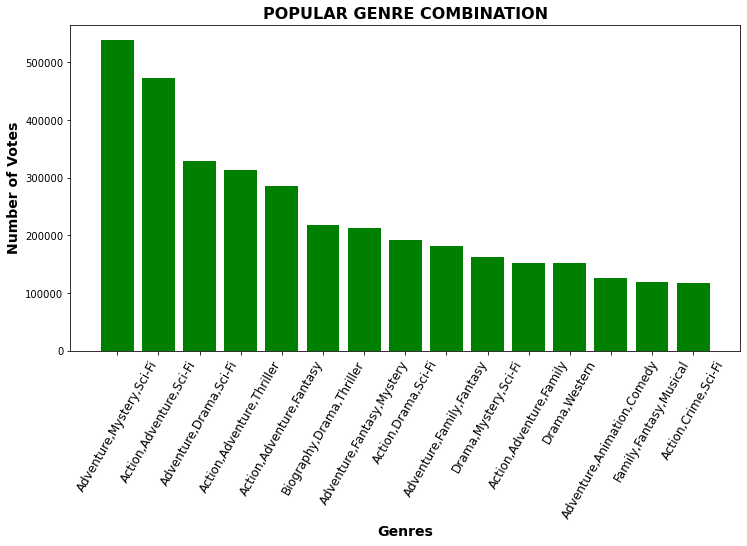

In [38]:
#Plotting the most popular genre combinations
plt.figure(figsize=(12, 6))
plt.xticks(rotation=60, fontsize=12)
y = pop_genre["numvotes"]
plt.bar(y.index, y.values, color = 'green')
plt.title('POPULAR GENRE COMBINATION', fontsize = 16, fontweight = 'bold')
plt.ylabel('Number of Votes', fontsize = 14, fontweight = 'bold')
plt.xlabel('Genres', fontsize = 14, fontweight = 'bold');

Plotting the highest rated directors based on the filters stated below

In [39]:
#Join the persons, directors, movie_basics and movie_ratings tables
#Select the name, averagerating and name count keys
joining_tables = '''SELECT DISTINCT primary_name, COUNT(primary_name), averagerating
FROM persons AS p
JOIN directors AS d ON p.person_id = d.person_id
JOIN movie_basics AS mb ON mb.movie_id = d.movie_id
JOIN movie_ratings AS mr ON mr.movie_id = mb.movie_id
GROUP BY primary_name
HAVING averagerating > 8 AND COUNT(primary_name) > 10
ORDER BY averagerating DESC;
'''
director_rated = pd.read_sql(joining_tables, conn).head(10)
director_rated

,primary_name,COUNT(primary_name),averagerating
0,Vlad Yudin,14,9.3
1,Ross MacGibbon,12,9.1
2,Corey Lubowich,12,9.1
3,Vlatka Vorkapic,25,9.0
4,Sylvia Broeckx,28,9.0
5,Lisa Gossels,17,9.0
6,Erin Korbylo,28,9.0
7,Dennis Korbylo,28,9.0
8,Sharif Arafah,12,8.8
9,Nick Morris,13,8.8


In [40]:
#Converting into a DataFrame
df = pd.DataFrame(director_rated).set_index('primary_name')
df 

,COUNT(primary_name),averagerating
primary_name,,
Vlad Yudin,14,9.3
Ross MacGibbon,12,9.1
Corey Lubowich,12,9.1
Vlatka Vorkapic,25,9.0
Sylvia Broeckx,28,9.0
Lisa Gossels,17,9.0
Erin Korbylo,28,9.0
Dennis Korbylo,28,9.0
Sharif Arafah,12,8.8


Plotting the movie count and average rating against the producing director

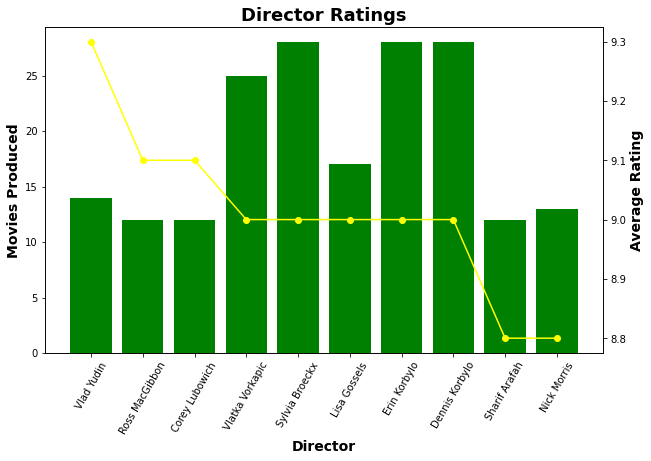

In [41]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot the count of primary name on the first y-axis
ax1.bar(df.index, df['COUNT(primary_name)'], color='green')
ax1.set_ylabel('Movies Produced', fontsize = 14, fontweight = 'bold')

# Plot the average rating on the second y-axis
ax2 = ax1.twinx()
ax2.plot(df.index, df['averagerating'], color='yellow', marker='o')
ax2.set_ylabel('Average Rating', fontsize = 14, fontweight = 'bold')

# Setting the title, x- axis labels and ticks
plt.title('Director Ratings', fontsize = 18, fontweight = 'bold')
ax1.set_xlabel('Director', fontsize = 14, fontweight = 'bold')
ax1.set_xticks(range(len(df)))
ax1.set_xticklabels(df.index, rotation = 60)

plt.show()

## Conclusion
1. **A huge investment does not necessarily mean high returns.** This is as indicated by a thorough analysis of the Return on Investment(ROI). This means Microsoft should consider other factors that may have an influence on the returns, as examined and explained in the next three points. 
2. **Documentary, Drama and Comedy are leading genres when considered individually.** If Microsoft is considering having movies based purely on one genre, Documentary, Drama and Comedy would be good niches to specialize in.
3. If, however, the company wants to maximize on the film business, they should consider producing movies that are a combination of different genres, with the two leading combinations being the Adventrue and Sci-Fi genres.
4. **Top performing directors.** The analysis provides the list of top rated directors based on movie popularity, which could inform Microsoft's decision on whether to poach them or make fresh hires.

## Next Steps

* Go ahead to produce original video content.
* Starting off with movies that will cost less yet sell more so as to maximize profits. 
* Consider using the services of movie directors who have a record of consistent high rating.